<a href="https://colab.research.google.com/github/U-CovUni/NLP-CourseWork1/blob/main/7120CEM_tweet_stance_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
! pip install textblob emoji scikit-learn

# Download necessary corpora for TextBlob
! python -m textblob.download_corpora

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the data
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.7 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Read data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semEval.csv')
data.head()

# Initialize lemmatizer and stopwords list
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preprocessing function
def preprocess(tweet):
    # Remove URLs, mentions, hashtags, punctuation, emojis, and convert to lowercase
    tweet = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]', '', tweet.lower())
    tweet = remove_emoji(tweet)
    # Correct spelling using TextBlob
    tweet = str(TextBlob(tweet).correct())
    words = tweet.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to each tweet
data['Clean_Tweet'] = data['Tweet'].apply(preprocess)

# Convert stance to numerical
stance_map = {'AGAINST': 0, 'FAVOR': 1, 'NONE': 2}
data['Stance_Num'] = data['Stance'].map(stance_map)

In [ ]:
data.head()

,ID,Target,Tweet,Stance,Clean_Tweet,Stance_Num
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST,dear lord thank u blessing forgive sin lord gi...,0
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST,blessed peacemaker shall called child god matt...,0
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST,confirmed world transformed rendering mind,0
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST,sarah prayed warns prayer done sarah amazon 10746,0
4,105,Atheism,And stay in your houses and do not display you...,AGAINST,stay house display like time ignorance ran 3333,0


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Classifier: Logistic Regression
Best Parameters: {'clf__C': 10, 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 3)}
Accuracy: 0.5612788632326821
Confusion Matrix:
[[200  38  30]
 [ 54  57  24]
 [ 79  22  59]]
Classification Report:
              precision    recall  f1-score     support
AGAINST        0.600601  0.746269  0.665557  268.000000
FAVOR          0.487179  0.422222  0.452381  135.000000
NONE           0.522124  0.368750  0.432234  160.000000
accuracy       0.561279  0.561279  0.561279    0.561279
macro avg      0.536635  0.512414  0.516724  563.000000
weighted avg   0.551101  0.561279  0.548132  563.000000


Classifier: SVM
Best Parameters: {'clf__C': 10, 'clf__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_ran

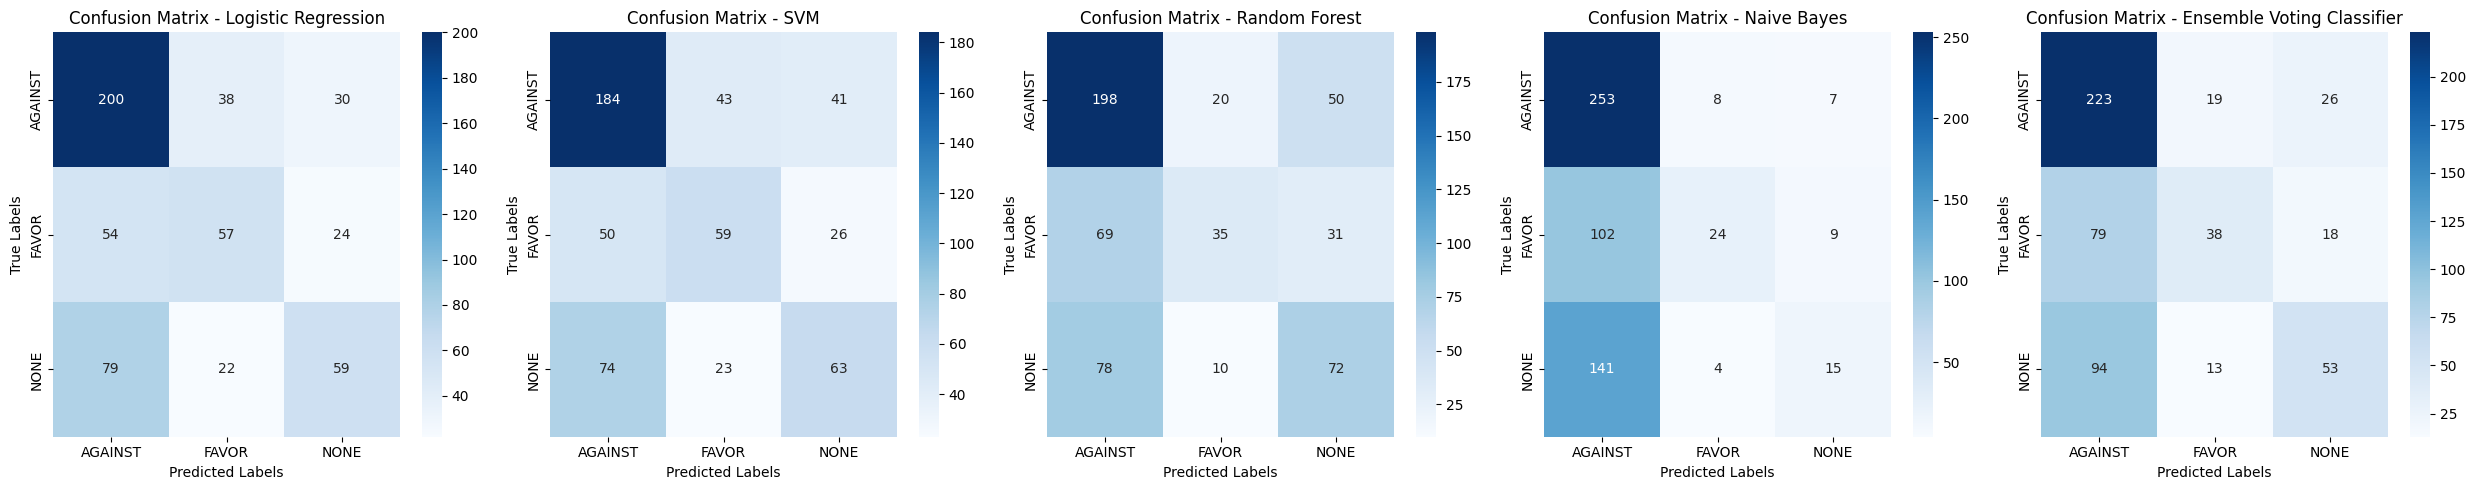

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data['Clean_Tweet'], data['Stance_Num'], test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Define a parameter grid for GridSearchCV
param_grid = {
    'Logistic Regression': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__C': [0.1, 1, 10]
    },
    'SVM': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__n_estimators': [100, 200, 300]
    },
    'Naive Bayes': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000]
    }
}

# Store results
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),  # No specific settings here, it will be set by GridSearchCV
        ('clf', clf)
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1, verbose=2, error_score='raise')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, target_names=['AGAINST', 'FAVOR', 'NONE'], output_dict=True)

    # Store results
    results.append({
        'Classifier': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': clf_report
    })

# Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=2000, C=results[0]['Best Params']['clf__C'])),
    ('svm', SVC(random_state=42, kernel=results[1]['Best Params']['clf__kernel'], C=results[1]['Best Params']['clf__C'])),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=results[2]['Best Params']['clf__n_estimators'])),
    ('nb', MultinomialNB())
], voting='hard')

pipeline_voting = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),  # Using best parameters
    ('clf', voting_clf)
])

# Fit the ensemble model
pipeline_voting.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_voting = pipeline_voting.predict(X_test)

# Evaluate ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
clf_report_voting = classification_report(y_test, y_pred_voting, target_names=['AGAINST', 'FAVOR', 'NONE'], output_dict=True)

# Store ensemble result
results.append({
    'Classifier': 'Ensemble Voting Classifier',
    'Accuracy': accuracy_voting,
    'Confusion Matrix': conf_matrix_voting,
    'Classification Report': clf_report_voting
})

# Display results
for result in results:
    print(f"Classifier: {result['Classifier']}")
    if 'Best Params' in result:
        print(f"Best Parameters: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['Classification Report']).transpose())
    print("\n")

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for ax, result in zip(axes, results):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=['AGAINST', 'FAVOR', 'NONE'], yticklabels=['AGAINST', 'FAVOR', 'NONE'])
    ax.set_title(f"Confusion Matrix - {result['Classifier']}")
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()



In [ ]:
# Function to predict stance in tweets(Atheism)
def predict_stance(tweet):
    cleaned_tweet = preprocess(tweet)
    stance_num = grid_search.predict([cleaned_tweet])[0]
    return list(stance_map.keys())[list(stance_map.values()).index(stance_num)]

In [ ]:
# Test the model with n tweets
test_tweets = [
    "God is great and always watching over us. #blessed",
    "Religion is just a way to control people. Think for yourself!",
    "I respect everyone's beliefs, whether they're religious or not.",
    "Science has disproven the existence of any deity.",
    "Faith gives me strength to face life's challenges.",
    "I am a happy an with God by my side"
    "Evidence-based thought has its feet planted on the ground.  Superstition-based thought does not"
]

In [ ]:
print("\nTesting the model with tweets:")
for tweet in test_tweets:
    stance = predict_stance(tweet)
    print(f"Tweet: {tweet}")
    print(f"Predicted stance: {stance}\n")


Testing the model with new tweets:
Tweet: God is great and always watching over us. #blessed
Predicted stance: AGAINST

Tweet: Religion is just a way to control people. Think for yourself!
Predicted stance: AGAINST

Tweet: I respect everyone's beliefs, whether they're religious or not.
Predicted stance: AGAINST

Tweet: Science has disproven the existence of any deity.
Predicted stance: FAVOR

Tweet: Faith gives me strength to face life's challenges.
Predicted stance: AGAINST

Tweet: I am a happy an with God by my sideEvidence-based thought has its feet planted on the ground.  Superstition-based thought does not
Predicted stance: FAVOR

